# Tutorial: Batch Conversion of OpenSCENARIO file to the CommonRoad format

This tutorial explains how to use the batch processing to convert OpenSCENARIO to CommonRoad in parallel. Please make sure that you have correctly gone through the tutorial Nr. 0.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import os
import re
import pickle
from datetime import datetime

from osc_cr_converter.utility.configuration import ConverterParams
from osc_cr_converter.converter.osc2cr import Osc2CrConverter
from osc_cr_converter.converter.serializable import Serializable
from osc_cr_converter.batch.converter import BatchConverter
from osc_cr_converter.batch.analysis import analyze_results

In [2]:
# ==== specify the directory contained openscenario files that to be batch-processed
directory = '../scenarios/'
# ==== specify the output dir
output_dir = '../output/batch/'
# ==== set the configuration and initialize single converter
config = ConverterParams()
converter = Osc2CrConverter(config)
# === initialize the batch converter
batch_converter = BatchConverter(converter)
# ====specify the storage dictionary
storage_dir = output_dir + "{}".format(datetime.now().isoformat(sep="_", timespec="seconds"))
os.makedirs(storage_dir, exist_ok=True)
Serializable.storage_dir = storage_dir

## Batch conversion, analyse, and visualization

In [3]:
# ==== discover the files
# * recursively: whether search recursively starting at the directory
batch_converter.discover_files(directory, re.compile(r".*\.xosc", re.IGNORECASE), recursively=True)
# ==== run batch conversion
batch_converter.run_batch_conversion(num_worker=0)

100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


In [4]:
# === analyse the result
with open(os.path.join(storage_dir, "statistics.pickle"), "rb") as stats_file:
    # We don't need the scenario files for this analysis, just slows us down
    Serializable.import_extra_files = False
    all_results = pickle.load(stats_file)
if all_results:
    analyze_results(all_results)

Total num scenarios                                    8
Average scenario duration                          9.930992193221883
Average runtime                                    0.02219092845916748
--------------------------------------------------------------------------------
OpenDRIVE Conversion run rate                      100.0 % (2/2)
OpenDRIVE Conversion success rate                  100.0 % (2/2)
                                                   100.0 % (2/2)
--------------------------------------------------------------------------------
Sim Ending causes:
 | FAILURE                                           0.0 % (0/2)
 | MAX_TIME_REACHED                                  0.0 % (0/2)
 | END_DETECTED                                      0.0 % (0/2)
 | SCENARIO_FINISHED_BY_SIMULATOR                  100.0 % (2/2)

################################################################################
Granularity SCENARIO
----------------------------------------------------------------

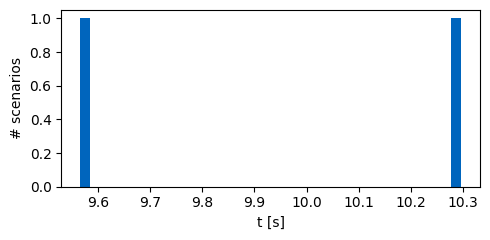

In [5]:
# === visualize the conversion statistics
from osc_cr_converter.batch.analysis import plot_sim_times, plot_runtimes, plot_num_obstacles, plot_scenarios
# * scenario duration
plot_sim_times(all_results, n_bins=40)

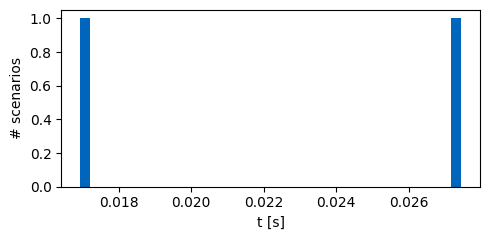

In [6]:
# * runtime of scenario conversion
plot_runtimes(all_results, n_bins=40)

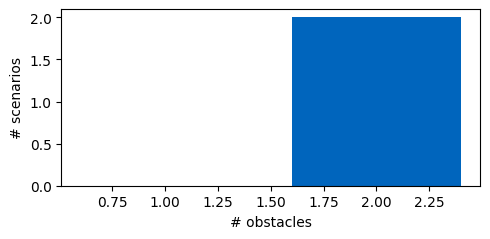

In [7]:
# * nr of obstacles
plot_num_obstacles(all_results)

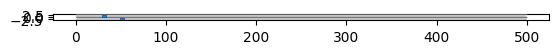

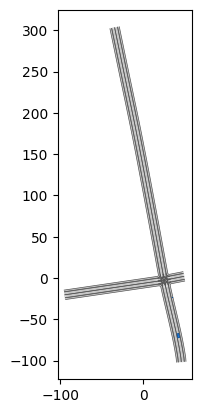

In [8]:
# * scenarios
plot_scenarios(all_results)